# İK Analitiği Dersi – Veri Temizleme & EDA
`I_K_Analitig_i_Dersi_Anket_2026.xlsx`

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd

## 1. Kütüphaneler ve Veri Yükleme

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [55]:
df = pd.read_csv('https://raw.githubusercontent.com/suacalis/IK_Analitigi_2026/refs/heads/main/IK_Analitigi_Temiz.csv', sep=';')

In [56]:
df.head()

,Numaranız,Doğum Yılınız,Boyunuz cm olarak,Kilonuz,Ayakkabı Numaranız,Göz Renginiz,Saç Renginiz,Doğum Yeri İlçe,Doğum Yeri İl,Mezun Olduğunuz Lisenin Adı,Mezun Olduğunuz Lisenin Bulunduğu İl,Üniversite Giriş Sınavında Yerleşme Puanız,Üniversite Giriş Sınavında Yerleşme Sıralamanız,Ailenizin İkamet Ettiği İl,Babanızın Eğitim Durumu,Babanızın Mesleği,Annenizin Eğitim Durumu,Annenizin Mesleği,Kardeş Sayısı (Tek Çocuk iseniz 0 Yazınız),Şu anki Not Ortalamanız,İkamet Ettiğiniz İl,İkamet Ettiğiniz İlçe,İkamet Ettiğiniz Mahalle,İkamet Ettiğiniz Yer,Aylık Ortalama Harcamanız TL.,Aylık Ortalama Geliriniz TL.,Her zaman Kulanabileceğiniz Bir Bilgisayara Sahip misiniz,Python İle ilgili Bilgi Düzeyiniz,Çalışma Durumunuz,Cep Telefonunuz,Kredi Kartınız
0,1,1994,160,74,38,Siyah,Kestane,Oğuzeli,Gaziantep,Hacı Muzaffer Bakbak Kml,Gaziantep,288,31385.0,Sakarya,Lise,Serbest Meslek,İlköğretim,Ev Hanımı,4,"3,47",Sakarya,Arifiye,Hanlıköy,Diğer,12000.0,4000.0,Evet,Hiç Yok,Çalışmıyorum,Var,Var
1,2,2003,160,49,37,Kahverengi,Kahverengi,Geyve,Sakarya,Cemil Meriç Sosyal Bilimler Lisesi,Sakarya,"327,13",253408.0,Sakarya,Lise,Emekli,Ortaokul,Ev Hanımı,3,"3,26",Sakarya,Geyve,Kemalpaşa Mahallesi,Devlet Yurdu,8000.0,8000.0,Evet,Lisede Görmüştüm,Çalışmıyorum,Var,Yok
2,3,2005,165,67,37,Kahverengi,Kahverengi,Kadıköy,İstanbul,Sınav Koleji,Bilecik,339,300000.0,Bilecik,Lise,Üretim Sorumlusu,Lise,Ev Hanımı,3,"2,12",Bilecik,Bozüyük,Nan,Devlet Yurdu,10000.0,9000.0,Evet,Hiç Yok,Çalışmıyorum,Var,Yok
3,4,2002,162,50,37,Gri,Kumral,Adapazarı,Sakarya,Cumhuriyet Anadolu Lisesi,Sakarya,"308,75584",354086.0,Sakarya,Lise,Emekli,Eğitim Almadı,Ev Hanımı,1,"2,96",Sakarya,Arifiye,Arifbey Mahallesi,Aile Yanı,15000.0,15000.0,Evet,Hiç Yok,Çalışıyorum,Var,Var
4,5,2004,170,85,41,Ela,Siyah,Hendek,Sakarya,Tes-Iş Adapazarı Anadolu Lisesi,Sakarya,288,480000.0,Sakarya,Lise,Memur,Ortaokul,Ev Hanımı,1,"3,24",Sakarya,Adapazarı,Karaman,Aile Yanı,NaN,14000.0,Evet,Diğer,Çalışıyorum,Var,Var


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 31 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Numaranız                                                  42 non-null     int64  
 1   Doğum Yılınız                                              42 non-null     int64  
 2   Boyunuz cm olarak                                          42 non-null     int64  
 3   Kilonuz                                                    42 non-null     int64  
 4   Ayakkabı Numaranız                                         41 non-null     object 
 5   Göz Renginiz                                               42 non-null     object 
 6   Saç Renginiz                                               42 non-null     object 
 7   Doğum Yeri İlçe                                            42 non-null     object 
 8   Doğum Yeri İ

## 2. Sorunlu Sütunlar

| Sütun | Sorun |
|-------|-------|
| Boy | 1.67 (metre) ve 67 (eksik basamak) |
| Ayakkabı | 71 (gerçekçi değil) |
| Göz / Saç Rengi | Büyük-küçük harf karışıklığı, yazım hataları |
| YKS Puanı | Metin değerler, çok büyük sayılar |
| YKS Sıralaması | '520bin', '300K', '-' gibi değerler |
| Kardeş Sayısı | 'Sekiz', 'Bir' gibi metin değerler |
| Harcama / Gelir | '7.000 TL', '20bin', çok küçük sayılar |
| Kilo | 1 adet eksik değer |


In [9]:
df['Mezun Olduğunuz Lisenin Adı'] = df['Mezun Olduğunuz Lisenin Adı'].str.strip().str.title()

In [10]:
df['Babanızın Mesleği'] = df['Babanızın Mesleği'].str.strip().str.title()

In [11]:
df['Python İle ilgili Bilgi Düzeyiniz'] = df['Python İle ilgili Bilgi Düzeyiniz'].str.strip().str.title()

In [12]:
for col in df.select_dtypes(include='object').columns:
    if df[col].astype(str).str.islower().any() or df[col].astype(str).str.isupper().any() or df[col].astype(str).str.contains(r'\s\s').any():
        df[col] = df[col].astype(str).str.strip().str.title()
        print(f"'{col}' sütunu güncellendi.")


'Göz Renginiz' sütunu güncellendi.
'Saç Renginiz' sütunu güncellendi.
'Doğum Yeri İlçe' sütunu güncellendi.
'Doğum Yeri İl' sütunu güncellendi.
'Mezun Olduğunuz Lisenin Adı' sütunu güncellendi.
'Mezun Olduğunuz Lisenin Bulunduğu İl' sütunu güncellendi.
'Üniversite Giriş Sınavında Yerleşme Puanız' sütunu güncellendi.
'Üniversite Giriş Sınavında Yerleşme Sıralamanız' sütunu güncellendi.
'Ailenizin İkamet Ettiği İl' sütunu güncellendi.
'Babanızın Eğitim Durumu' sütunu güncellendi.
'Annenizin Eğitim Durumu' sütunu güncellendi.
'Annenizin Mesleği' sütunu güncellendi.
'İkamet Ettiğiniz İl' sütunu güncellendi.
'İkamet Ettiğiniz İlçe' sütunu güncellendi.
'İkamet Ettiğiniz Mahalle' sütunu güncellendi.
'Aylık Ortalama Harcamanız TL.' sütunu güncellendi.
'Aylık Ortalama Geliriniz TL.' sütunu güncellendi.


In [13]:
df.head()

,Numaranız,Doğum Yılınız,Boyunuz cm olarak,Kilonuz,Ayakkabı Numaranız,Göz Renginiz,Saç Renginiz,Doğum Yeri İlçe,Doğum Yeri İl,Mezun Olduğunuz Lisenin Adı,Mezun Olduğunuz Lisenin Bulunduğu İl,Üniversite Giriş Sınavında Yerleşme Puanız,Üniversite Giriş Sınavında Yerleşme Sıralamanız,Ailenizin İkamet Ettiği İl,Babanızın Eğitim Durumu,Babanızın Mesleği,Annenizin Eğitim Durumu,Annenizin Mesleği,Kardeş Sayısı (Tek Çocuk iseniz 0 Yazınız),Şu anki Not Ortalamanız,İkamet Ettiğiniz İl,İkamet Ettiğiniz İlçe,İkamet Ettiğiniz Mahalle,İkamet Ettiğiniz Yer,Aylık Ortalama Harcamanız TL.,Aylık Ortalama Geliriniz TL.,Her zaman Kulanabileceğiniz Bir Bilgisayara Sahip misiniz,Python İle ilgili Bilgi Düzeyiniz,Çalışma Durumunuz,Cep Telefonunuz,Kredi Kartınız
0,1,1994,160.0,74.0,38.0,Siyah,Kestane,Oğuzeli,Gaziantep,Hacı Muzaffer Bakbak Kml,Gaziantep,288,313.85,Sakarya,Lise,Serbest Meslek,İlköğretim,Ev Hanımı,4,3.47,Sakarya,Arifiye,Hanlıköy,Diğer,12000,4000,Evet,Hiç Yok,Çalışmıyorum,Var,Var
1,2,2003,160.0,49.0,37.0,Kahverengi,Kahverengi,Geyve,Sakarya,Cemil Meriç Sosyal Bilimler Lisesi,Sakarya,327.13,253408,Sakarya,Lise,Emekli,Ortaokul,Ev Hanımı,3,3.26,Sakarya,Geyve,Kemalpaşa Mahallesi,Devlet Yurdu,8000,8000,Evet,Lisede Görmüştüm,Çalışmıyorum,Var,Yok
2,3,2005,165.0,67.0,37.0,Kahverengi,Kahverengi,Kadıköy,İstanbul,Sınav Koleji,Bilecik,339,300000,Bilecik,Lise,Üretim Sorumlusu,Lise,Ev Hanımı,3,2.12,Bişecik,Bozüyük,Nan,Devlet Yurdu,10000,9000,Evet,Hiç Yok,Çalışmıyorum,Var,Yok
3,4,2002,162.0,50.0,37.0,Gri,Kumral,Adapazarı,Sakarya,Cumhuriyet Anadolu Lisesi,Sakarya,308.75584,354086,Sakarya,Lise,Emekli,Eğitim Almadı,Ev Hanımı,1,2.96,Sakarya,Arifiye,Arifbey Mahallesi,Aile Yanı,15000,15000,Evet,Hiç Yok,Çalışıyorum,Var,Var
4,5,2004,170.0,85.0,41.0,Ela,Siyah,Hendek,Sakarya,Tes-Iş Adapazarı Anadolu Lisesi,Sakarya,288,480000,Sakarya,Lise,Memur,Ortaokul,Ev Hanımı,1,3.24,Sakarya,Adapazarı,Karaman,Aile Yanı,Bilmiyorum,14000,Evet,Diğer,Çalışıyorum,Var,Var


In [14]:
df['İkamet Ettiğiniz İl'] = df['İkamet Ettiğiniz İl'].replace('Bişecik', 'Bilecik')
print(df[df['İkamet Ettiğiniz İl'] == 'Bilecik']['İkamet Ettiğiniz İl'].value_counts())


İkamet Ettiğiniz İl
Bilecik    1
Name: count, dtype: int64


In [15]:
df.tail()

,Numaranız,Doğum Yılınız,Boyunuz cm olarak,Kilonuz,Ayakkabı Numaranız,Göz Renginiz,Saç Renginiz,Doğum Yeri İlçe,Doğum Yeri İl,Mezun Olduğunuz Lisenin Adı,Mezun Olduğunuz Lisenin Bulunduğu İl,Üniversite Giriş Sınavında Yerleşme Puanız,Üniversite Giriş Sınavında Yerleşme Sıralamanız,Ailenizin İkamet Ettiği İl,Babanızın Eğitim Durumu,Babanızın Mesleği,Annenizin Eğitim Durumu,Annenizin Mesleği,Kardeş Sayısı (Tek Çocuk iseniz 0 Yazınız),Şu anki Not Ortalamanız,İkamet Ettiğiniz İl,İkamet Ettiğiniz İlçe,İkamet Ettiğiniz Mahalle,İkamet Ettiğiniz Yer,Aylık Ortalama Harcamanız TL.,Aylık Ortalama Geliriniz TL.,Her zaman Kulanabileceğiniz Bir Bilgisayara Sahip misiniz,Python İle ilgili Bilgi Düzeyiniz,Çalışma Durumunuz,Cep Telefonunuz,Kredi Kartınız
37,38,2004,170.0,65.0,42.0,Ela,Kahverengi,Gerze,Sinop,Sinop Anadolu Lisesi,Sinop,314687,525324,Sinop,Lise,Serbest,Lise,Tekstil Elemanı,3,2.52,Sakarya,Serdivan,Kemalpasa,Diğer,8000,10000,Hayır,Hiç Yok,Çalışıyorum,Var,Var
38,39,2005,168.0,54.0,37.0,Kahverengi,Siyah,Geyve,Sakarya,Geyve Anadolu Lisesi,Sakarya,440 Bin,440 Bin,Sakarya,Ortaokul,İşçi,İlkokul,Ev Hanımı,2,2.39,Sakarya,Geyve,Tepecikler,Aile Yanı,10000,Nan,Evet,Hiç Yok,Çalışıyorum,Var,Var
39,40,2004,167.0,75.0,39.0,Ela,Kahverengi,Izmit,Kocaeli,Yahya Kaptan Anadolu Lisesi,Kocaeli,350,400000,Kocaeli,Ilköğretim,Emekli,Ilköğretim,Ev Hanımı,2,2.32,Kocaeli,Izmit,28 Haziran Mahallesi,Aile Yanı,15000,0,Evet,Hiç Yok,Çalışmıyorum,Var,Yok
40,41,2004,171.0,53.0,39.0,Kahve,Kahve,Bandırma,Balıkesir,Mithatpaşa Anadolu Lisesi,Sakarya,Nan,Nan,Sakarya,Üniversite,Makina Mühendisi,Lise,Ev Hanımı,Bir,2.30,Sakarya,Serdivan,Bahçelievler,Aile Yanı,15,15,Evet,Hiç Yok,Çalışıyorum,Var,Var
41,42,2004,174.0,75.0,39.0,Kahverengi,Kumral,İzmit,Kocaeli,Tevfik Seno Arda Anadolu Lisesi,Kocaeli,Nan,Nan,Kocaeli,Lise Mezunu,Üretim Sorumlusu,Üniversite Mezunu,Muhasebe Müdürü,2,2.07,Kocaeli,İzmit,Tepecik Mahallesi,Aile Yanı,10,10,Evet,Hiç Yok,Çalışmıyorum,Var,Yok


In [16]:
# Veri tipleri
df.dtypes


,0
Numaranız,int64
Doğum Yılınız,int64
Boyunuz cm olarak,float64
Kilonuz,float64
Ayakkabı Numaranız,float64
Göz Renginiz,object
Saç Renginiz,object
Doğum Yeri İlçe,object
Doğum Yeri İl,object
Mezun Olduğunuz Lisenin Adı,object


## 3. Veri Temizleme

### 3.1 Boy
1.67 → 167 cm, 67 → 167 cm

In [17]:
def temizle_boy(x):
    if pd.isna(x): return np.nan
    x = float(x)
    if x < 3:    x = x * 100   # metre → cm
    if x < 100:  x = x + 100   # eksik basamak
    return x

df['Boyunuz cm olarak'] = df['Boyunuz cm olarak'].apply(temizle_boy)
print(df['Boyunuz cm olarak'].sort_values().tolist())


[150.0, 155.0, 155.0, 159.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 161.0, 162.0, 162.0, 162.0, 163.0, 163.0, 165.0, 167.0, 167.0, 167.0, 167.0, 167.0, 168.0, 168.0, 168.0, 168.0, 169.0, 170.0, 170.0, 170.0, 170.0, 170.0, 170.0, 170.0, 171.0, 172.0, 172.0, 173.0, 174.0, 177.0, 180.0, 180.0]


### 3.2 Ayakkabı
50'den büyük değerler → NaN

In [18]:
df['Ayakkabı Numaranız'] = df['Ayakkabı Numaranız'].apply(
    lambda x: np.nan if not pd.isna(x) and float(x) > 50 else x
)
print(df['Ayakkabı Numaranız'].sort_values().tolist())


[36.0, 36.0, 36.0, 36.0, 36.5, 36.5, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 40.0, 40.0, 41.0, 42.0, 42.0, 42.0, 43.0, nan]


### 3.3 Göz Rengi
Yazım hatalarını düzelt, büyük harf standardize et

In [19]:
goz_map = {
    'kahverengi': 'Kahverengi', 'kahve': 'Kahverengi',
    'koyu kahve': 'Kahverengi', 'kavherengi': 'Kahverengi',
    'ela': 'Ela', 'kehribar': 'Ela',
    'siyah': 'Siyah', 'gri': 'Gri', 'mavi': 'Mavi', 'yeşil': 'Yeşil',
}

df['Göz Renginiz'] = df['Göz Renginiz'].str.strip().str.lower().map(goz_map)
print(df['Göz Renginiz'].value_counts())


Göz Renginiz
Kahverengi    25
Ela            8
Siyah          5
Yeşil          2
Gri            1
Mavi           1
Name: count, dtype: int64


### 3.4 Saç Rengi

In [20]:
sac_map = {
    'kahverengi': 'Kahverengi', 'kahve': 'Kahverengi', 'koyu kahve': 'Kahverengi',
    'siyah': 'Siyah', 'kumral': 'Kumral', 'a.kumral': 'Kumral',
    'kestane': 'Kestane', 'sari': 'Sarı', 'sarı': 'Sarı',
}

df['Saç Renginiz'] = df['Saç Renginiz'].str.strip().str.lower().map(sac_map)
print(df['Saç Renginiz'].value_counts())


Saç Renginiz
Kahverengi    20
Siyah         13
Kumral         6
Sarı           2
Kestane        1
Name: count, dtype: int64


### 3.5 YKS Puanı
Geçerli aralık: 100–600

In [21]:
def temizle_puan(x):
    if pd.isna(x): return np.nan
    x = str(x).strip().replace(',', '.')
    if any(c in x.lower() for c in ['hatırla', '-', 'bin', 'k']): return np.nan
    try:
        val = float(x)
        return val if 100 <= val <= 600 else np.nan
    except:
        return np.nan

df['Üniversite Giriş Sınavında Yerleşme Puanız'] = (
    df['Üniversite Giriş Sınavında Yerleşme Puanız'].apply(temizle_puan)
)
print(df['Üniversite Giriş Sınavında Yerleşme Puanız'].dropna().sort_values().tolist())


[280.0, 283.0, 284.0, 287.0, 288.0, 288.0, 289.0, 296.0, 299.02495, 300.0, 303.0, 308.75584, 310.0, 320.0, 322.0, 325.0, 327.13, 330.0, 339.0, 339.16038, 350.0, 350.0, 353.73, 390.0, 473.0]


### 3.6 YKS Sıralaması
'520bin', '300K' gibi değerleri sayıya çevir

In [22]:
import re

def temizle_siralama(x):
    if pd.isna(x): return np.nan
    x = str(x).strip().lower()
    if x in ['-', 'nan', '1']: return np.nan

    # '520bin', '440 bin' → sayı * 1000
    m = re.search(r'([\d]+)\s*bin', x)
    if m: return float(m.group(1)) * 1000

    # '300k', '300K' → sayı * 1000
    m = re.search(r'([\d]+)\s*k', x)
    if m: return float(m.group(1)) * 1000

    # Sadece sayıyı al, 100-4.000.000 aralığı kontrolü
    nums = re.findall(r'[\d]+', x.replace('.', ''))
    if nums:
        val = float(nums[0])
        return val if 100 <= val <= 4_000_000 else np.nan
    return np.nan

df['Üniversite Giriş Sınavında Yerleşme Sıralamanız'] = (
    df['Üniversite Giriş Sınavında Yerleşme Sıralamanız'].apply(temizle_siralama)
)
print(df['Üniversite Giriş Sınavında Yerleşme Sıralamanız'].dropna().sort_values().tolist())


[31385.0, 164960.0, 213216.0, 250000.0, 253408.0, 300000.0, 300000.0, 300000.0, 354086.0, 360000.0, 379067.0, 400000.0, 400000.0, 400000.0, 419433.0, 420000.0, 420000.0, 430000.0, 437753.0, 439644.0, 440000.0, 480000.0, 490000.0, 504000.0, 506000.0, 509000.0, 520000.0, 525324.0, 889736.0]


### 3.7 Kardeş Sayısı
'Sekiz' → 8, 'Bir' → 1

In [23]:
sayi_map = {'sıfır':0,'bir':1,'iki':2,'üç':3,'dört':4,
            'beş':5,'altı':6,'yedi':7,'sekiz':8,'dokuz':9}

def temizle_kardes(x):
    if pd.isna(x): return np.nan
    try:
        return int(float(str(x).strip()))
    except:
        return sayi_map.get(str(x).strip().lower(), np.nan)

df['Kardeş Sayısı (Tek Çocuk iseniz 0 Yazınız)'] = (
    df['Kardeş Sayısı (Tek Çocuk iseniz 0 Yazınız)'].apply(temizle_kardes)
)
print(df['Kardeş Sayısı (Tek Çocuk iseniz 0 Yazınız)'].value_counts().sort_index())


Kardeş Sayısı (Tek Çocuk iseniz 0 Yazınız)
0     1
1    14
2    15
3     9
4     2
8     1
Name: count, dtype: int64


### 3.8 Aylık Harcama & Gelir
'7.000 TL', '20bin', çok küçük değerler düzeltildi

In [24]:
def temizle_para(x):
    if pd.isna(x): return np.nan
    x = str(x).strip().lower().replace(' tl', '').replace('tl', '')
    if 'bilmiyorum' in x: return np.nan

    m = re.search(r'([\d]+)\s*bin', x)
    if m: return float(m.group(1)) * 1000

    try:
        val = float(x.replace('.', '').replace(',', '.'))
        if val < 500: val *= 1000   # çok küçük değer → binlerle ifade edilmiş
        return val if val <= 100_000 else np.nan
    except:
        return np.nan

df['Aylık Ortalama Harcamanız TL.'] = df['Aylık Ortalama Harcamanız TL.'].apply(temizle_para)
df['Aylık Ortalama Geliriniz TL.']   = df['Aylık Ortalama Geliriniz TL.'].apply(temizle_para)

print("Harcama:", df['Aylık Ortalama Harcamanız TL.'].sort_values().tolist())
print("Gelir:",   df['Aylık Ortalama Geliriniz TL.'].sort_values().tolist())


Harcama: [4000.0, 4000.0, 4000.0, 4000.0, 6000.0, 6000.0, 7000.0, 7000.0, 7000.0, 7000.0, 7000.0, 8000.0, 8000.0, 8000.0, 9000.0, 9000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 12000.0, 12000.0, 12000.0, 12000.0, 15000.0, 15000.0, 15000.0, 15000.0, 20000.0, 20000.0, nan, nan, nan]
Gelir: [0.0, 0.0, 0.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 5000.0, 6000.0, 7000.0, 7000.0, 8000.0, 8000.0, 9000.0, 9000.0, 9000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 12000.0, 12000.0, 12000.0, 12000.0, 14000.0, 15000.0, 15000.0, 20000.0, 20000.0, 20000.0, nan, nan, nan, nan, nan, nan, nan]


### 3.9 Kilo – Eksik Değer
Medyan ile doldur

In [25]:
df['Kilonuz'] = df['Kilonuz'].fillna(df['Kilonuz'].median())
print("Eksik değer kaldı mı:", df['Kilonuz'].isna().sum())


Eksik değer kaldı mı: 0


### 3.10 Temiz Veriyi Kaydet

In [26]:
df.to_excel('IK_Analitigi_Temiz.xlsx', index=False)
print("Kaydedildi. Boyut:", df.shape)


Kaydedildi. Boyut: (42, 31)


## 4. En Çok Kullanılan Pandas Kodları

### 4.1 Temel Keşif

In [27]:
df.isnull().sum()

,0
Numaranız,0
Doğum Yılınız,0
Boyunuz cm olarak,0
Kilonuz,0
Ayakkabı Numaranız,1
Göz Renginiz,0
Saç Renginiz,0
Doğum Yeri İlçe,0
Doğum Yeri İl,0
Mezun Olduğunuz Lisenin Adı,0


In [28]:
df.shape

(42, 31)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 31 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Numaranız                                                  42 non-null     int64  
 1   Doğum Yılınız                                              42 non-null     int64  
 2   Boyunuz cm olarak                                          42 non-null     float64
 3   Kilonuz                                                    42 non-null     float64
 4   Ayakkabı Numaranız                                         41 non-null     float64
 5   Göz Renginiz                                               42 non-null     object 
 6   Saç Renginiz                                               42 non-null     object 
 7   Doğum Yeri İlçe                                            42 non-null     object 
 8   Doğum Yeri İ

In [30]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Numaranız,42.0,21.50,12.27,1.00,11.25,21.50,31.75,42.00
Doğum Yılınız,42.0,2003.62,1.85,1994.00,2003.00,2004.00,2005.00,2005.00
Boyunuz cm olarak,42.0,166.24,6.47,150.00,161.25,167.00,170.00,180.00
Kilonuz,42.0,61.29,11.09,40.00,53.25,58.00,68.00,85.00
Ayakkabı Numaranız,41.0,38.34,1.77,36.00,37.00,38.00,39.00,43.00
Üniversite Giriş Sınavında Yerleşme Puanız,25.0,321.39,42.03,280.00,289.00,310.00,339.00,473.00
Üniversite Giriş Sınavında Yerleşme Sıralamanız,29.0,397828.00,149888.39,31385.00,300000.00,419433.00,480000.00,889736.00
Kardeş Sayısı (Tek Çocuk iseniz 0 Yazınız),42.0,2.07,1.31,0.00,1.00,2.00,3.00,8.00
Şu anki Not Ortalamanız,42.0,2.57,0.49,1.31,2.28,2.64,2.93,3.55
Aylık Ortalama Harcamanız TL.,39.0,9820.51,3803.54,4000.00,7000.00,10000.00,11000.00,20000.00


In [31]:
df.head()

,Numaranız,Doğum Yılınız,Boyunuz cm olarak,Kilonuz,Ayakkabı Numaranız,Göz Renginiz,Saç Renginiz,Doğum Yeri İlçe,Doğum Yeri İl,Mezun Olduğunuz Lisenin Adı,Mezun Olduğunuz Lisenin Bulunduğu İl,Üniversite Giriş Sınavında Yerleşme Puanız,Üniversite Giriş Sınavında Yerleşme Sıralamanız,Ailenizin İkamet Ettiği İl,Babanızın Eğitim Durumu,Babanızın Mesleği,Annenizin Eğitim Durumu,Annenizin Mesleği,Kardeş Sayısı (Tek Çocuk iseniz 0 Yazınız),Şu anki Not Ortalamanız,İkamet Ettiğiniz İl,İkamet Ettiğiniz İlçe,İkamet Ettiğiniz Mahalle,İkamet Ettiğiniz Yer,Aylık Ortalama Harcamanız TL.,Aylık Ortalama Geliriniz TL.,Her zaman Kulanabileceğiniz Bir Bilgisayara Sahip misiniz,Python İle ilgili Bilgi Düzeyiniz,Çalışma Durumunuz,Cep Telefonunuz,Kredi Kartınız
0,1,1994,160.0,74.0,38.0,Siyah,Kestane,Oğuzeli,Gaziantep,Hacı Muzaffer Bakbak Kml,Gaziantep,288.00000,31385.0,Sakarya,Lise,Serbest Meslek,İlköğretim,Ev Hanımı,4,3.47,Sakarya,Arifiye,Hanlıköy,Diğer,12000.0,4000.0,Evet,Hiç Yok,Çalışmıyorum,Var,Var
1,2,2003,160.0,49.0,37.0,Kahverengi,Kahverengi,Geyve,Sakarya,Cemil Meriç Sosyal Bilimler Lisesi,Sakarya,327.13000,253408.0,Sakarya,Lise,Emekli,Ortaokul,Ev Hanımı,3,3.26,Sakarya,Geyve,Kemalpaşa Mahallesi,Devlet Yurdu,8000.0,8000.0,Evet,Lisede Görmüştüm,Çalışmıyorum,Var,Yok
2,3,2005,165.0,67.0,37.0,Kahverengi,Kahverengi,Kadıköy,İstanbul,Sınav Koleji,Bilecik,339.00000,300000.0,Bilecik,Lise,Üretim Sorumlusu,Lise,Ev Hanımı,3,2.12,Bilecik,Bozüyük,Nan,Devlet Yurdu,10000.0,9000.0,Evet,Hiç Yok,Çalışmıyorum,Var,Yok
3,4,2002,162.0,50.0,37.0,Gri,Kumral,Adapazarı,Sakarya,Cumhuriyet Anadolu Lisesi,Sakarya,308.75584,354086.0,Sakarya,Lise,Emekli,Eğitim Almadı,Ev Hanımı,1,2.96,Sakarya,Arifiye,Arifbey Mahallesi,Aile Yanı,15000.0,15000.0,Evet,Hiç Yok,Çalışıyorum,Var,Var
4,5,2004,170.0,85.0,41.0,Ela,Siyah,Hendek,Sakarya,Tes-Iş Adapazarı Anadolu Lisesi,Sakarya,288.00000,480000.0,Sakarya,Lise,Memur,Ortaokul,Ev Hanımı,1,3.24,Sakarya,Adapazarı,Karaman,Aile Yanı,NaN,14000.0,Evet,Diğer,Çalışıyorum,Var,Var


In [32]:
df.isnull().sum()

,0
Numaranız,0
Doğum Yılınız,0
Boyunuz cm olarak,0
Kilonuz,0
Ayakkabı Numaranız,1
Göz Renginiz,0
Saç Renginiz,0
Doğum Yeri İlçe,0
Doğum Yeri İl,0
Mezun Olduğunuz Lisenin Adı,0


In [33]:
df.duplicated().sum()

np.int64(0)

In [34]:
df.nunique()

,0
Numaranız,42
Doğum Yılınız,6
Boyunuz cm olarak,18
Kilonuz,23
Ayakkabı Numaranız,9
Göz Renginiz,6
Saç Renginiz,5
Doğum Yeri İlçe,29
Doğum Yeri İl,17
Mezun Olduğunuz Lisenin Adı,40


### 4.2 Sütun Seçme ve Filtreleme

In [35]:
print(df.columns.tolist())
df['Cep Telefonunuz ']

['Numaranız', 'Doğum Yılınız', 'Boyunuz cm olarak', 'Kilonuz', 'Ayakkabı Numaranız', 'Göz Renginiz', 'Saç Renginiz', 'Doğum Yeri İlçe', 'Doğum Yeri İl', 'Mezun Olduğunuz Lisenin Adı', 'Mezun Olduğunuz Lisenin Bulunduğu İl', 'Üniversite Giriş Sınavında Yerleşme Puanız', 'Üniversite Giriş Sınavında Yerleşme Sıralamanız', 'Ailenizin İkamet Ettiği İl', 'Babanızın Eğitim Durumu', 'Babanızın Mesleği', 'Annenizin Eğitim Durumu', 'Annenizin Mesleği', 'Kardeş Sayısı (Tek Çocuk iseniz 0 Yazınız)', 'Şu anki Not Ortalamanız', 'İkamet Ettiğiniz İl', 'İkamet Ettiğiniz İlçe', 'İkamet Ettiğiniz Mahalle', 'İkamet Ettiğiniz Yer', 'Aylık Ortalama Harcamanız TL.', 'Aylık Ortalama Geliriniz TL.', 'Her zaman Kulanabileceğiniz Bir Bilgisayara Sahip misiniz', 'Python İle ilgili Bilgi Düzeyiniz', 'Çalışma Durumunuz', 'Cep Telefonunuz ', 'Kredi Kartınız']


,Cep Telefonunuz
0,Var
1,Var
2,Var
3,Var
4,Var
5,Var
6,Var
7,Var
8,Var
9,Var


In [36]:
df[['Boyunuz cm olarak', 'Kilonuz', 'Şu anki Not Ortalamanız']]

,Boyunuz cm olarak,Kilonuz,Şu anki Not Ortalamanız
0,160.0,74.0,3.47
1,160.0,49.0,3.26
2,165.0,67.0,2.12
3,162.0,50.0,2.96
4,170.0,85.0,3.24
5,170.0,75.0,2.03
6,168.0,65.0,2.64
7,159.0,54.0,2.70
8,168.0,58.0,2.67
9,172.0,64.0,2.38


In [37]:
df[df['Şu anki Not Ortalamanız'] >= 2.0]

,Numaranız,Doğum Yılınız,Boyunuz cm olarak,Kilonuz,Ayakkabı Numaranız,Göz Renginiz,Saç Renginiz,Doğum Yeri İlçe,Doğum Yeri İl,Mezun Olduğunuz Lisenin Adı,Mezun Olduğunuz Lisenin Bulunduğu İl,Üniversite Giriş Sınavında Yerleşme Puanız,Üniversite Giriş Sınavında Yerleşme Sıralamanız,Ailenizin İkamet Ettiği İl,Babanızın Eğitim Durumu,Babanızın Mesleği,Annenizin Eğitim Durumu,Annenizin Mesleği,Kardeş Sayısı (Tek Çocuk iseniz 0 Yazınız),Şu anki Not Ortalamanız,İkamet Ettiğiniz İl,İkamet Ettiğiniz İlçe,İkamet Ettiğiniz Mahalle,İkamet Ettiğiniz Yer,Aylık Ortalama Harcamanız TL.,Aylık Ortalama Geliriniz TL.,Her zaman Kulanabileceğiniz Bir Bilgisayara Sahip misiniz,Python İle ilgili Bilgi Düzeyiniz,Çalışma Durumunuz,Cep Telefonunuz,Kredi Kartınız
0,1,1994,160.0,74.0,38.0,Siyah,Kestane,Oğuzeli,Gaziantep,Hacı Muzaffer Bakbak Kml,Gaziantep,288.00000,31385.0,Sakarya,Lise,Serbest Meslek,İlköğretim,Ev Hanımı,4,3.47,Sakarya,Arifiye,Hanlıköy,Diğer,12000.0,4000.0,Evet,Hiç Yok,Çalışmıyorum,Var,Var
1,2,2003,160.0,49.0,37.0,Kahverengi,Kahverengi,Geyve,Sakarya,Cemil Meriç Sosyal Bilimler Lisesi,Sakarya,327.13000,253408.0,Sakarya,Lise,Emekli,Ortaokul,Ev Hanımı,3,3.26,Sakarya,Geyve,Kemalpaşa Mahallesi,Devlet Yurdu,8000.0,8000.0,Evet,Lisede Görmüştüm,Çalışmıyorum,Var,Yok
2,3,2005,165.0,67.0,37.0,Kahverengi,Kahverengi,Kadıköy,İstanbul,Sınav Koleji,Bilecik,339.00000,300000.0,Bilecik,Lise,Üretim Sorumlusu,Lise,Ev Hanımı,3,2.12,Bilecik,Bozüyük,Nan,Devlet Yurdu,10000.0,9000.0,Evet,Hiç Yok,Çalışmıyorum,Var,Yok
3,4,2002,162.0,50.0,37.0,Gri,Kumral,Adapazarı,Sakarya,Cumhuriyet Anadolu Lisesi,Sakarya,308.75584,354086.0,Sakarya,Lise,Emekli,Eğitim Almadı,Ev Hanımı,1,2.96,Sakarya,Arifiye,Arifbey Mahallesi,Aile Yanı,15000.0,15000.0,Evet,Hiç Yok,Çalışıyorum,Var,Var
4,5,2004,170.0,85.0,41.0,Ela,Siyah,Hendek,Sakarya,Tes-Iş Adapazarı Anadolu Lisesi,Sakarya,288.00000,480000.0,Sakarya,Lise,Memur,Ortaokul,Ev Hanımı,1,3.24,Sakarya,Adapazarı,Karaman,Aile Yanı,NaN,14000.0,Evet,Diğer,Çalışıyorum,Var,Var
5,6,2004,170.0,75.0,40.0,Kahverengi,Kahverengi,Inegöl,Bursa,Turgut Alp Anadolu Lisesi,Bursa,NaN,NaN,Bursa,Ortaokul,Emekli,Ortaokul,Ev Hanımı,1,2.03,Sakarya,Serdivan,Kemalpaşa,Devlet Yurdu,10000.0,5000.0,Evet,Hiç Yok,Çalışmıyorum,Var,Yok
6,7,2005,168.0,65.0,38.0,Kahverengi,Kahverengi,Sultanbeyli,İstanbul,Şehit Ömer Halisdemir Anadolu Lisesi,Sancaktepe/Istanbul,NaN,NaN,İstanbul,Ortaokul,İnşaatçı,Ortaokul,Temizlik Personeli,3,2.64,İstanbul,Sancaktepe,Osmangazi Mah.,Aile Yanı,10000.0,10000.0,Evet,Hiç Yok,Çalışmıyorum,Var,Yok
7,8,2004,159.0,54.0,37.0,Kahverengi,Siyah,Çatalca,İstanbul,Büyükçekmece Anadolu Lisesi,İstanbul,310.00000,250000.0,Büyükçekmece,Ortaokul Mezunu,Emekli,İlkokul Mezunu,Ev Hanımı,1,2.70,İstanbul,Büyükçekmece,Ahmediye,Devlet Yurdu,6000.0,4000.0,Evet,Lisede Görmüştüm,Çalışmıyorum,Var,Yok
8,9,2003,168.0,58.0,39.0,Ela,Siyah,Antakya,Hatay,Güngören Anadolu Lisesi,İstanbul,NaN,NaN,İstanbul,İlkokul Mezunu,Tekstil Çalışanı,İlkokul Mezunu,Aşçı,2,2.67,Sakarya,Serdivan,Nan,Devlet Yurdu,7000.0,7000.0,Evet,Hiç Yok,Çalışmıyorum,Var,Var
9,10,2005,172.0,64.0,39.0,Kahverengi,Kahverengi,Osmangazi,Bursa,Nan,Bursa,NaN,520000.0,Bursa,İlkokul,Emekli,İlkokul,Çalışmıyor,2,2.38,Bursa,Osmangazi,Çiftehavuzlar,Özel Yurt,20000.0,20000.0,Evet,Hiç Yok,Çalışıyorum,Var,Var


In [38]:
df[(df['Kilonuz'] < 60) & (df['Boyunuz cm olarak'] > 165)]

,Numaranız,Doğum Yılınız,Boyunuz cm olarak,Kilonuz,Ayakkabı Numaranız,Göz Renginiz,Saç Renginiz,Doğum Yeri İlçe,Doğum Yeri İl,Mezun Olduğunuz Lisenin Adı,Mezun Olduğunuz Lisenin Bulunduğu İl,Üniversite Giriş Sınavında Yerleşme Puanız,Üniversite Giriş Sınavında Yerleşme Sıralamanız,Ailenizin İkamet Ettiği İl,Babanızın Eğitim Durumu,Babanızın Mesleği,Annenizin Eğitim Durumu,Annenizin Mesleği,Kardeş Sayısı (Tek Çocuk iseniz 0 Yazınız),Şu anki Not Ortalamanız,İkamet Ettiğiniz İl,İkamet Ettiğiniz İlçe,İkamet Ettiğiniz Mahalle,İkamet Ettiğiniz Yer,Aylık Ortalama Harcamanız TL.,Aylık Ortalama Geliriniz TL.,Her zaman Kulanabileceğiniz Bir Bilgisayara Sahip misiniz,Python İle ilgili Bilgi Düzeyiniz,Çalışma Durumunuz,Cep Telefonunuz,Kredi Kartınız
8,9,2003,168.0,58.0,39.0,Ela,Siyah,Antakya,Hatay,Güngören Anadolu Lisesi,İstanbul,NaN,NaN,İstanbul,İlkokul Mezunu,Tekstil Çalışanı,İlkokul Mezunu,Aşçı,2,2.67,Sakarya,Serdivan,Nan,Devlet Yurdu,7000.0,7000.0,Evet,Hiç Yok,Çalışmıyorum,Var,Var
10,11,2005,167.0,54.0,36.0,Kahverengi,Kahverengi,Ankara Yenimahalle,Nan,Bahçeşehir Koleji,Bolu Merkez,NaN,300000.0,Bolu,Lise,Makina Baş Teknisyeni,Önlisans,Sekreter,3,2.38,Bolu,Merkez,Beşkavaklar Mahallesi,Aile Yanı,NaN,NaN,Evet,Hiç Yok,Çalışmıyorum,Var,Var
11,12,2003,167.0,57.0,37.0,Kahverengi,Kahverengi,Merkez,Karaman,Karaman Lisesi,Karaman,390.00000,400000.0,Karaman,Ortaokul,Yurt Dışı Fabrika Şefi,İlkokul,Ev Hanımı,3,2.28,Karaman,Merkez,Elmaşehir Mahallesi,Özel Yurt,15000.0,0.0,Evet,Hiç Yok,Çalışmıyorum,Var,Var
14,15,2005,170.0,55.0,38.0,Kahverengi,Kahverengi,Osmangazi,Bursa,Barış Anadolu Lisesi,Bursa,280.00000,NaN,Bursa,Üniversite,Teknik Öğretmen,Lise,Muhasebe,0,2.00,Bursa,Nilüfer,Ataevler,Diğer,10000.0,NaN,Evet,Hiç Yok,Çalışmıyorum,Var,Var
15,16,2005,172.0,52.0,39.0,Kahverengi,Sarı,Kadıköy,Istanbul,Mustafa Kemal Anadolu Lisesi,Ataşehir,287.00000,509000.0,Istanbul,Ortaokul,Klima Kombi Teknisyeni,Lise,Hemşire Yardımcısı,1,2.02,Istanbul,Ataşehir,Içerenköy,Devlet Yurdu,10000.0,NaN,Evet,Hiç Yok,Çalışmıyorum,Var,Var
19,20,2004,168.0,53.0,39.0,Kahverengi,Kahverengi,Adapazarı,Sakarya,Ali Dilmen Anadolu Lisesi,Sakarya,473.00000,NaN,Sakarya,Ilkokul Mezunu,Depo Görevlisi,Ilkoul Mezunu,Ev Hanımı,2,1.60,Sakarya,Adapazarı,Erenler,Aile Yanı,7000.0,7000.0,Evet,Hiç Yok,Çalışmıyorum,Var,Var
20,21,2005,169.0,57.0,39.0,Kahverengi,Kahverengi,Adapazarı,Sakarya,Şehit Muhammet Fatih Safitürk Anadolu Lisesi,Sakarya,299.02495,419433.0,Sakarya,Lise,İşçi,Lise,Ev Hanımı,1,2.69,Sakarya,Arifiye,Arifbey,Aile Yanı,7000.0,0.0,Evet,Hiç Yok,Çalışmıyorum,Var,Var
38,39,2005,168.0,54.0,37.0,Kahverengi,Siyah,Geyve,Sakarya,Geyve Anadolu Lisesi,Sakarya,NaN,440000.0,Sakarya,Ortaokul,İşçi,İlkokul,Ev Hanımı,2,2.39,Sakarya,Geyve,Tepecikler,Aile Yanı,10000.0,NaN,Evet,Hiç Yok,Çalışıyorum,Var,Var
40,41,2004,171.0,53.0,39.0,Kahverengi,Kahverengi,Bandırma,Balıkesir,Mithatpaşa Anadolu Lisesi,Sakarya,NaN,NaN,Sakarya,Üniversite,Makina Mühendisi,Lise,Ev Hanımı,1,2.30,Sakarya,Serdivan,Bahçelievler,Aile Yanı,15000.0,15000.0,Evet,Hiç Yok,Çalışıyorum,Var,Var


In [39]:
df[df['Göz Renginiz'].isin(['Kahverengi', 'Siyah'])]

,Numaranız,Doğum Yılınız,Boyunuz cm olarak,Kilonuz,Ayakkabı Numaranız,Göz Renginiz,Saç Renginiz,Doğum Yeri İlçe,Doğum Yeri İl,Mezun Olduğunuz Lisenin Adı,Mezun Olduğunuz Lisenin Bulunduğu İl,Üniversite Giriş Sınavında Yerleşme Puanız,Üniversite Giriş Sınavında Yerleşme Sıralamanız,Ailenizin İkamet Ettiği İl,Babanızın Eğitim Durumu,Babanızın Mesleği,Annenizin Eğitim Durumu,Annenizin Mesleği,Kardeş Sayısı (Tek Çocuk iseniz 0 Yazınız),Şu anki Not Ortalamanız,İkamet Ettiğiniz İl,İkamet Ettiğiniz İlçe,İkamet Ettiğiniz Mahalle,İkamet Ettiğiniz Yer,Aylık Ortalama Harcamanız TL.,Aylık Ortalama Geliriniz TL.,Her zaman Kulanabileceğiniz Bir Bilgisayara Sahip misiniz,Python İle ilgili Bilgi Düzeyiniz,Çalışma Durumunuz,Cep Telefonunuz,Kredi Kartınız
0,1,1994,160.0,74.0,38.0,Siyah,Kestane,Oğuzeli,Gaziantep,Hacı Muzaffer Bakbak Kml,Gaziantep,288.00000,31385.0,Sakarya,Lise,Serbest Meslek,İlköğretim,Ev Hanımı,4,3.47,Sakarya,Arifiye,Hanlıköy,Diğer,12000.0,4000.0,Evet,Hiç Yok,Çalışmıyorum,Var,Var
1,2,2003,160.0,49.0,37.0,Kahverengi,Kahverengi,Geyve,Sakarya,Cemil Meriç Sosyal Bilimler Lisesi,Sakarya,327.13000,253408.0,Sakarya,Lise,Emekli,Ortaokul,Ev Hanımı,3,3.26,Sakarya,Geyve,Kemalpaşa Mahallesi,Devlet Yurdu,8000.0,8000.0,Evet,Lisede Görmüştüm,Çalışmıyorum,Var,Yok
2,3,2005,165.0,67.0,37.0,Kahverengi,Kahverengi,Kadıköy,İstanbul,Sınav Koleji,Bilecik,339.00000,300000.0,Bilecik,Lise,Üretim Sorumlusu,Lise,Ev Hanımı,3,2.12,Bilecik,Bozüyük,Nan,Devlet Yurdu,10000.0,9000.0,Evet,Hiç Yok,Çalışmıyorum,Var,Yok
5,6,2004,170.0,75.0,40.0,Kahverengi,Kahverengi,Inegöl,Bursa,Turgut Alp Anadolu Lisesi,Bursa,NaN,NaN,Bursa,Ortaokul,Emekli,Ortaokul,Ev Hanımı,1,2.03,Sakarya,Serdivan,Kemalpaşa,Devlet Yurdu,10000.0,5000.0,Evet,Hiç Yok,Çalışmıyorum,Var,Yok
6,7,2005,168.0,65.0,38.0,Kahverengi,Kahverengi,Sultanbeyli,İstanbul,Şehit Ömer Halisdemir Anadolu Lisesi,Sancaktepe/Istanbul,NaN,NaN,İstanbul,Ortaokul,İnşaatçı,Ortaokul,Temizlik Personeli,3,2.64,İstanbul,Sancaktepe,Osmangazi Mah.,Aile Yanı,10000.0,10000.0,Evet,Hiç Yok,Çalışmıyorum,Var,Yok
7,8,2004,159.0,54.0,37.0,Kahverengi,Siyah,Çatalca,İstanbul,Büyükçekmece Anadolu Lisesi,İstanbul,310.00000,250000.0,Büyükçekmece,Ortaokul Mezunu,Emekli,İlkokul Mezunu,Ev Hanımı,1,2.70,İstanbul,Büyükçekmece,Ahmediye,Devlet Yurdu,6000.0,4000.0,Evet,Lisede Görmüştüm,Çalışmıyorum,Var,Yok
9,10,2005,172.0,64.0,39.0,Kahverengi,Kahverengi,Osmangazi,Bursa,Nan,Bursa,NaN,520000.0,Bursa,İlkokul,Emekli,İlkokul,Çalışmıyor,2,2.38,Bursa,Osmangazi,Çiftehavuzlar,Özel Yurt,20000.0,20000.0,Evet,Hiç Yok,Çalışıyorum,Var,Var
10,11,2005,167.0,54.0,36.0,Kahverengi,Kahverengi,Ankara Yenimahalle,Nan,Bahçeşehir Koleji,Bolu Merkez,NaN,300000.0,Bolu,Lise,Makina Baş Teknisyeni,Önlisans,Sekreter,3,2.38,Bolu,Merkez,Beşkavaklar Mahallesi,Aile Yanı,NaN,NaN,Evet,Hiç Yok,Çalışmıyorum,Var,Var
11,12,2003,167.0,57.0,37.0,Kahverengi,Kahverengi,Merkez,Karaman,Karaman Lisesi,Karaman,390.00000,400000.0,Karaman,Ortaokul,Yurt Dışı Fabrika Şefi,İlkokul,Ev Hanımı,3,2.28,Karaman,Merkez,Elmaşehir Mahallesi,Özel Yurt,15000.0,0.0,Evet,Hiç Yok,Çalışmıyorum,Var,Var
12,13,2005,161.0,56.0,37.0,Kahverengi,Kahverengi,Altınordu,Ordu,Başöğretmen Anadolu Lisesi,Ordu,283.00000,420000.0,Ordu,Ortaokul,Makine Konkosörü,İlkokul,Ev Hanımı,2,2.64,Otduu,Altınordu,Şahincili,Aile Yanı,10000.0,10000.0,Evet,Hiç Yok,Çalışmıyorum,Var,Var


In [40]:
df.query('`Şu anki Not Ortalamanız` > 3 and Kilonuz < 70')

,Numaranız,Doğum Yılınız,Boyunuz cm olarak,Kilonuz,Ayakkabı Numaranız,Göz Renginiz,Saç Renginiz,Doğum Yeri İlçe,Doğum Yeri İl,Mezun Olduğunuz Lisenin Adı,Mezun Olduğunuz Lisenin Bulunduğu İl,Üniversite Giriş Sınavında Yerleşme Puanız,Üniversite Giriş Sınavında Yerleşme Sıralamanız,Ailenizin İkamet Ettiği İl,Babanızın Eğitim Durumu,Babanızın Mesleği,Annenizin Eğitim Durumu,Annenizin Mesleği,Kardeş Sayısı (Tek Çocuk iseniz 0 Yazınız),Şu anki Not Ortalamanız,İkamet Ettiğiniz İl,İkamet Ettiğiniz İlçe,İkamet Ettiğiniz Mahalle,İkamet Ettiğiniz Yer,Aylık Ortalama Harcamanız TL.,Aylık Ortalama Geliriniz TL.,Her zaman Kulanabileceğiniz Bir Bilgisayara Sahip misiniz,Python İle ilgili Bilgi Düzeyiniz,Çalışma Durumunuz,Cep Telefonunuz,Kredi Kartınız
1,2,2003,160.0,49.0,37.0,Kahverengi,Kahverengi,Geyve,Sakarya,Cemil Meriç Sosyal Bilimler Lisesi,Sakarya,327.13,253408.0,Sakarya,Lise,Emekli,Ortaokul,Ev Hanımı,3,3.26,Sakarya,Geyve,Kemalpaşa Mahallesi,Devlet Yurdu,8000.0,8000.0,Evet,Lisede Görmüştüm,Çalışmıyorum,Var,Yok
17,18,2001,160.0,68.0,38.0,Kahverengi,Siyah,Çaldıran,Van,Namık Kemal Anadolu Lisesi,Kocaeli,NaN,379067.0,Kocaeli,İlköğretim Terk,Çiftçi,Yok,Ev Hanımı,8,3.11,Kocaeli,Kartepe,Uzunçiftlik Mh,Aile Yanı,4000.0,8000.0,Evet,Hiç Yok,Çalışmıyorum,Var,Yok
24,25,2004,163.0,51.0,37.0,Ela,Kahverengi,Gebze,Kocaeli,Fatih Sultan Mehmet Anadolu Lisesi,Kocaeli,284.00,506000.0,Kocaeli,Lise Mezunu,Emekli,Önlisans Mezunu,Hemşire,1,3.55,Sakaryq,Serdivan,Kemalpaşa,Devlet Yurdu,9000.0,12000.0,Evet,Hiç Yok,Çalışmıyorum,Var,Yok
25,26,2004,170.0,68.0,39.0,Siyah,Siyah,Sultanbeyli,İstanbul,Hüsnü Mehmet Özyeğin Anadolu Lisesi,İstanbul,NaN,430000.0,İstanbul,Ortaokul,Serbest Meslek,Ortaokul,Ev Hanımı,1,3.08,İstanbul,Sultanbeyli,Necip Fazıl Mahallesi,Aile Yanı,4000.0,4000.0,Evet,Hiç Yok,Çalışmıyorum,Var,Yok
29,30,2005,162.0,60.0,38.0,Yeşil,Kumral,Gebze,Kocaeli,Cumhuriyet Anadolu Lisesi,Kocaeli,NaN,NaN,Kocaeli,İlkokul Mezunu,Serbest Meslek,İlkokul Mezunu,Çalışmıyor,2,3.28,Kocaeli,Gebze,Yavuz Selim Mahallesi,Aile Yanı,10000.0,NaN,Hayır,Hiç Yok,Çalışmıyorum,Var,Var
32,33,2004,162.0,45.0,36.5,Kahverengi,Kumral,Erenler,Sakarya,Açıköğretim Lisesi,Sakarya,296.00,439644.0,Sakarya,Lise,Emekli,Ortaokul,Ev Hanımı,1,3.15,Sakarya,Erenler,Dilmen Mahallesi,Aile Yanı,8000.0,12000.0,Evet,Hiç Yok,Çalışıyorum,Var,Var


In [41]:
df.sort_values('Şu anki Not Ortalamanız', ascending=False).head(10)

,Numaranız,Doğum Yılınız,Boyunuz cm olarak,Kilonuz,Ayakkabı Numaranız,Göz Renginiz,Saç Renginiz,Doğum Yeri İlçe,Doğum Yeri İl,Mezun Olduğunuz Lisenin Adı,Mezun Olduğunuz Lisenin Bulunduğu İl,Üniversite Giriş Sınavında Yerleşme Puanız,Üniversite Giriş Sınavında Yerleşme Sıralamanız,Ailenizin İkamet Ettiği İl,Babanızın Eğitim Durumu,Babanızın Mesleği,Annenizin Eğitim Durumu,Annenizin Mesleği,Kardeş Sayısı (Tek Çocuk iseniz 0 Yazınız),Şu anki Not Ortalamanız,İkamet Ettiğiniz İl,İkamet Ettiğiniz İlçe,İkamet Ettiğiniz Mahalle,İkamet Ettiğiniz Yer,Aylık Ortalama Harcamanız TL.,Aylık Ortalama Geliriniz TL.,Her zaman Kulanabileceğiniz Bir Bilgisayara Sahip misiniz,Python İle ilgili Bilgi Düzeyiniz,Çalışma Durumunuz,Cep Telefonunuz,Kredi Kartınız
24,25,2004,163.0,51.0,37.0,Ela,Kahverengi,Gebze,Kocaeli,Fatih Sultan Mehmet Anadolu Lisesi,Kocaeli,284.00000,506000.0,Kocaeli,Lise Mezunu,Emekli,Önlisans Mezunu,Hemşire,1,3.55,Sakaryq,Serdivan,Kemalpaşa,Devlet Yurdu,9000.0,12000.0,Evet,Hiç Yok,Çalışmıyorum,Var,Yok
0,1,1994,160.0,74.0,38.0,Siyah,Kestane,Oğuzeli,Gaziantep,Hacı Muzaffer Bakbak Kml,Gaziantep,288.00000,31385.0,Sakarya,Lise,Serbest Meslek,İlköğretim,Ev Hanımı,4,3.47,Sakarya,Arifiye,Hanlıköy,Diğer,12000.0,4000.0,Evet,Hiç Yok,Çalışmıyorum,Var,Var
29,30,2005,162.0,60.0,38.0,Yeşil,Kumral,Gebze,Kocaeli,Cumhuriyet Anadolu Lisesi,Kocaeli,NaN,NaN,Kocaeli,İlkokul Mezunu,Serbest Meslek,İlkokul Mezunu,Çalışmıyor,2,3.28,Kocaeli,Gebze,Yavuz Selim Mahallesi,Aile Yanı,10000.0,NaN,Hayır,Hiç Yok,Çalışmıyorum,Var,Var
1,2,2003,160.0,49.0,37.0,Kahverengi,Kahverengi,Geyve,Sakarya,Cemil Meriç Sosyal Bilimler Lisesi,Sakarya,327.13000,253408.0,Sakarya,Lise,Emekli,Ortaokul,Ev Hanımı,3,3.26,Sakarya,Geyve,Kemalpaşa Mahallesi,Devlet Yurdu,8000.0,8000.0,Evet,Lisede Görmüştüm,Çalışmıyorum,Var,Yok
4,5,2004,170.0,85.0,41.0,Ela,Siyah,Hendek,Sakarya,Tes-Iş Adapazarı Anadolu Lisesi,Sakarya,288.00000,480000.0,Sakarya,Lise,Memur,Ortaokul,Ev Hanımı,1,3.24,Sakarya,Adapazarı,Karaman,Aile Yanı,NaN,14000.0,Evet,Diğer,Çalışıyorum,Var,Var
32,33,2004,162.0,45.0,36.5,Kahverengi,Kumral,Erenler,Sakarya,Açıköğretim Lisesi,Sakarya,296.00000,439644.0,Sakarya,Lise,Emekli,Ortaokul,Ev Hanımı,1,3.15,Sakarya,Erenler,Dilmen Mahallesi,Aile Yanı,8000.0,12000.0,Evet,Hiç Yok,Çalışıyorum,Var,Var
17,18,2001,160.0,68.0,38.0,Kahverengi,Siyah,Çaldıran,Van,Namık Kemal Anadolu Lisesi,Kocaeli,NaN,379067.0,Kocaeli,İlköğretim Terk,Çiftçi,Yok,Ev Hanımı,8,3.11,Kocaeli,Kartepe,Uzunçiftlik Mh,Aile Yanı,4000.0,8000.0,Evet,Hiç Yok,Çalışmıyorum,Var,Yok
25,26,2004,170.0,68.0,39.0,Siyah,Siyah,Sultanbeyli,İstanbul,Hüsnü Mehmet Özyeğin Anadolu Lisesi,İstanbul,NaN,430000.0,İstanbul,Ortaokul,Serbest Meslek,Ortaokul,Ev Hanımı,1,3.08,İstanbul,Sultanbeyli,Necip Fazıl Mahallesi,Aile Yanı,4000.0,4000.0,Evet,Hiç Yok,Çalışmıyorum,Var,Yok
3,4,2002,162.0,50.0,37.0,Gri,Kumral,Adapazarı,Sakarya,Cumhuriyet Anadolu Lisesi,Sakarya,308.75584,354086.0,Sakarya,Lise,Emekli,Eğitim Almadı,Ev Hanımı,1,2.96,Sakarya,Arifiye,Arifbey Mahallesi,Aile Yanı,15000.0,15000.0,Evet,Hiç Yok,Çalışıyorum,Var,Var
30,31,2003,155.0,49.0,36.0,Kahverengi,Kahverengi,Posof,Ardahan,Avcılar Firuzköy Çok Programlı Anadolu Lisesi,İstanbul,325.00000,420000.0,İstanbul,Ortaokul,Emekli,Ortaokul,Ev Hanımı,2,2.95,İstanbul,Avcılar,Yeşilkent,Aile Yanı,10000.0,10000.0,Evet,Hiç Yok,Çalışmıyorum,Var,Yok


### 4.3 Gruplama

In [42]:
df.groupby('Göz Renginiz')['Şu anki Not Ortalamanız'].mean().sort_values(ascending=False)


,Şu anki Not Ortalamanız
Göz Renginiz,
Gri,2.96000
Siyah,2.90400
Yeşil,2.74000
Ela,2.66625
Kahverengi,2.46080
Mavi,2.08000


In [43]:
df.groupby('Çalışma Durumunuz').agg(
    ort_gelir=('Aylık Ortalama Geliriniz TL.', 'mean'),
    ort_not=('Şu anki Not Ortalamanız', 'mean'),
    kisi=('Numaranız', 'count')
).round(2)


,ort_gelir,ort_not,kisi
Çalışma Durumunuz,,,
Çalışmıyorum,7115.38,2.57,32
Çalışıyorum,15000.00,2.57,10


In [44]:
pd.pivot_table(df,
    values='Şu anki Not Ortalamanız',
    index='Çalışma Durumunuz',
    columns='Her zaman Kulanabileceğiniz Bir Bilgisayara Sahip misiniz',
    aggfunc='mean').round(2)


Her zaman Kulanabileceğiniz Bir Bilgisayara Sahip misiniz,Evet,Hayır
Çalışma Durumunuz,,
Çalışmıyorum,2.59,2.30
Çalışıyorum,2.57,2.52


### 4.4 Yeni Sütun Oluşturma

In [45]:
# Yaş
df['Yaş'] = 2026 - df['Doğum Yılınız']
df[['Doğum Yılınız', 'Yaş']].head()


,Doğum Yılınız,Yaş
0,1994,32
1,2003,23
2,2005,21
3,2002,24
4,2004,22


In [46]:
# BMI
df['BMI'] = (df['Kilonuz'] / (df['Boyunuz cm olarak'] / 100) ** 2).round(1)
df['BMI_Kategori'] = pd.cut(df['BMI'],
    bins=[0, 18.5, 25, 30, 100],
    labels=['Zayıf', 'Normal', 'Fazla Kilolu', 'Obez'])
df[['Kilonuz', 'Boyunuz cm olarak', 'BMI', 'BMI_Kategori']].head()


,Kilonuz,Boyunuz cm olarak,BMI,BMI_Kategori
0,74.0,160.0,28.9,Fazla Kilolu
1,49.0,160.0,19.1,Normal
2,67.0,165.0,24.6,Normal
3,50.0,162.0,19.1,Normal
4,85.0,170.0,29.4,Fazla Kilolu


In [47]:
# Not bandı
df['Not Bandı'] = pd.cut(df['Şu anki Not Ortalamanız'],
    bins=[0, 2.0, 2.5, 3.0, 4.0],
    labels=['Düşük', 'Orta', 'İyi', 'Yüksek'])
df['Not Bandı'].value_counts()


,count
Not Bandı,
Orta,15
İyi,15
Yüksek,8
Düşük,4


### 4.5 Diğer Kullanışlı Kodlar

<Axes: >

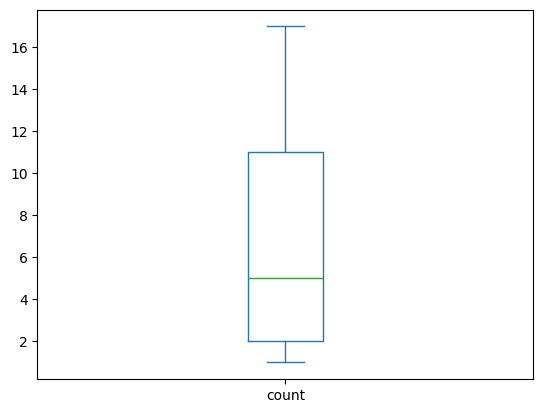

In [49]:
df['Yaş'].value_counts().plot.box()

In [ ]:
df.select_dtypes(include='number').corr().round(2)

In [ ]:
df.sample(5, random_state=42)

In [ ]:
df.rename(columns={
    'Şu anki Not Ortalamanız': 'GPA',
    'Aylık Ortalama Geliriniz TL.': 'Gelir',
    'Aylık Ortalama Harcamanız TL.': 'Harcama'
}).head()


## 5. Keşifsel Veri Analizi (EDA)

### 5.1 Sayısal Değişkenlerin Dağılımı

In [ ]:
sayisal = ['Boyunuz cm olarak', 'Kilonuz', 'Yaş',
           'Şu anki Not Ortalamanız', 'BMI',
           'Aylık Ortalama Harcamanız TL.', 'Aylık Ortalama Geliriniz TL.']

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(sayisal):
    axes[i].hist(df[col].dropna(), bins=10, color='steelblue', edgecolor='white')
    axes[i].axvline(df[col].mean(),   color='red',    linestyle='--', label='Ort')
    axes[i].axvline(df[col].median(), color='orange', linestyle='-',  label='Med')
    axes[i].set_title(col, fontsize=8)
    axes[i].legend(fontsize=7)

axes[-1].set_visible(False)
plt.suptitle('Dağılım Grafikleri', fontweight='bold')
plt.tight_layout()
plt.show()


### 5.2 Korelasyon Isı Haritası

In [ ]:
corr = df.select_dtypes(include='number').corr()

plt.figure(figsize=(11, 7))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm',
            mask=np.triu(np.ones_like(corr, dtype=bool)),
            linewidths=0.5, annot_kws={'size': 8})
plt.title('Korelasyon Matrisi', fontweight='bold')
plt.tight_layout()
plt.show()


### 5.3 Kategorik Değişkenler

In [ ]:
kategorik = ['Göz Renginiz', 'Saç Renginiz', 'BMI_Kategori',
             'Çalışma Durumunuz', 'Python İle ilgili Bilgi Düzeyiniz',
             'Her zaman Kulanabileceğiniz Bir Bilgisayara Sahip misiniz']

fig, axes = plt.subplots(2, 3, figsize=(15, 9))
axes = axes.flatten()

for i, col in enumerate(kategorik):
    counts = df[col].value_counts()
    axes[i].barh(counts.index, counts.values, color=sns.color_palette('Set2', len(counts)))
    axes[i].set_title(col, fontsize=8, fontweight='bold')
    for j, v in enumerate(counts.values):
        axes[i].text(v + 0.1, j, str(v), va='center', fontsize=8)

plt.suptitle('Kategorik Dağılımlar', fontweight='bold')
plt.tight_layout()
plt.show()


### 5.4 Çalışma Durumuna Göre Not Ortalaması

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

sns.boxplot(data=df, x='Çalışma Durumunuz',
            y='Şu anki Not Ortalamanız', palette='Set3', ax=axes[0])
axes[0].set_title('Not Dağılımı (Box Plot)', fontweight='bold')

grup = df.groupby('Çalışma Durumunuz')['Şu anki Not Ortalamanız'].mean().sort_values(ascending=False)
grup.plot(kind='bar', ax=axes[1], color='steelblue', edgecolor='grey')
axes[1].set_title('Ortalama Not', fontweight='bold')
axes[1].tick_params(axis='x', rotation=20)
for i, v in enumerate(grup.values):
    axes[1].text(i, v + 0.01, f'{v:.2f}', ha='center')

plt.tight_layout()
plt.show()


### 5.5 Boy – Kilo (BMI Kategorisine Göre)

In [ ]:
plt.figure(figsize=(9, 6))
renkler = {'Zayıf': 'skyblue', 'Normal': 'green', 'Fazla Kilolu': 'orange', 'Obez': 'red'}

for kat, renk in renkler.items():
    alt = df[df['BMI_Kategori'] == kat]
    plt.scatter(alt['Boyunuz cm olarak'], alt['Kilonuz'],
                label=kat, color=renk, s=70, alpha=0.8, edgecolors='white')

plt.xlabel('Boy (cm)')
plt.ylabel('Kilo (kg)')
plt.title('Boy – Kilo Dağılımı', fontweight='bold')
plt.legend(title='BMI')
plt.tight_layout()
plt.show()


### 5.6 Gelir – Harcama İlişkisi

In [ ]:
plt.figure(figsize=(9, 6))
sc = plt.scatter(df['Aylık Ortalama Geliriniz TL.'],
                 df['Aylık Ortalama Harcamanız TL.'],
                 c=df['Şu anki Not Ortalamanız'], cmap='RdYlGn',
                 s=80, alpha=0.85, edgecolors='grey')

# Gelir = Harcama referans çizgisi
lim = 25000
plt.plot([0, lim], [0, lim], 'k--', linewidth=1, label='Gelir = Harcama')
plt.colorbar(sc, label='Not Ortalaması')
plt.xlabel('Aylık Gelir (TL)')
plt.ylabel('Aylık Harcama (TL)')
plt.title('Gelir – Harcama İlişkisi', fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()


### 5.7 Python Bilgi Düzeyi (Pasta Grafik)

In [ ]:
dist = df['Python İle ilgili Bilgi Düzeyiniz'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(dist.values, labels=dist.index, autopct='%1.1f%%',
        colors=sns.color_palette('Pastel1', len(dist)),
        wedgeprops={'edgecolor': 'white', 'linewidth': 1.5},
        startangle=140)
plt.title('Python Bilgi Düzeyi', fontweight='bold')
plt.tight_layout()
plt.show()


### 5.8 Kardeş Sayısı – Not Ortalaması

In [ ]:
kardes = df.groupby('Kardeş Sayısı (Tek Çocuk iseniz 0 Yazınız)')['Şu anki Not Ortalamanız'].mean()

kardes.plot(kind='bar', figsize=(9, 5), color='steelblue', edgecolor='grey')
plt.xlabel('Kardeş Sayısı')
plt.ylabel('Ortalama Not')
plt.title('Kardeş Sayısı – Ortalama Not', fontweight='bold')
plt.xticks(rotation=0)
for i, v in enumerate(kardes.values):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')
plt.tight_layout()
plt.show()


### 5.9 Pair Plot

In [ ]:
pair_df = df[['Şu anki Not Ortalamanız', 'BMI',
              'Aylık Ortalama Geliriniz TL.', 'Not Bandı']].dropna()

sns.pairplot(pair_df, hue='Not Bandı',
             palette={'Düşük':'red','Orta':'orange','İyi':'steelblue','Yüksek':'green'},
             diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot', y=1.02, fontweight='bold')
plt.show()


### 5.10 Özet İstatistikler

In [ ]:
ozet = df.describe().T.round(2)
ozet['eksik'] = df.isnull().sum()
ozet
